In [229]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as dates
import statsmodels.api as sm
import seaborn as sns
import re
from scipy.stats import shapiro
sns.set()
from pylab import rcParams
plt.style.use('fivethirtyeight')
sns.set_context("notebook")
rcParams['figure.figsize'] = 15, 10

In [230]:
df = pd.read_pickle('nyc_rolling_sales_cleaned.pkl')
df.head()

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,ADDRESS,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,C2,153 AVENUE B,10009,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19
1,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,C4,154 EAST 7TH STREET,10009,10,0,10,2272,6794,1913,2,C4,3936272,2016-09-23
2,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,C2,301 EAST 10TH STREET,10009,6,0,6,2369,4615,1900,2,C2,8000000,2016-11-17
3,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,406,32,C4,210 AVENUE B,10009,8,0,8,1750,4226,1920,2,C4,3192840,2016-09-23
4,Manhattan,ALPHABET CITY,08 RENTALS - ELEVATOR APARTMENTS,2,387,153,D9,629 EAST 5TH STREET,10009,24,0,24,4489,18523,1920,2,D9,16232000,2016-11-07


#### 1) Which Borough/Neighborhood has the highest number of Sales?

Queens has the highest number of sales in Boroughs
FLUSHING-NORTH has the highest number of sales in Neighbourhood


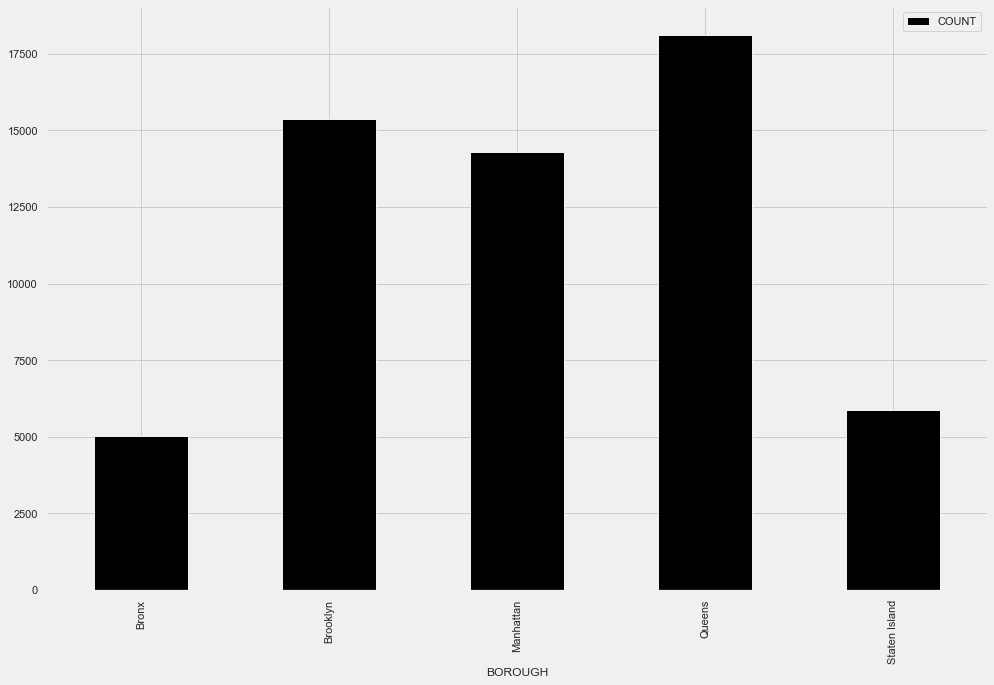

In [231]:
highest_sales_borough = df['BOROUGH'].groupby(df['BOROUGH']).count()
borough_index = highest_sales_borough.idxmax()
highest_sales_neighbour = df['NEIGHBORHOOD'].groupby(df['NEIGHBORHOOD']).count()
neighbour_index = highest_sales_neighbour.idxmax()
print(borough_index, "has the highest number of sales in Boroughs")
print(neighbour_index, "has the highest number of sales in Neighbourhood")
boroughs = highest_sales_borough.index
b_count = highest_sales_borough
b_df = pd.DataFrame({
    'BOROUGH' : boroughs,
    'COUNT' : b_count
})
b_df.plot.bar(x='BOROUGH', y='COUNT', color='Black', rot=90)

#### 2) For Each Borough, which Building Class has the highest number of Sales?

In [232]:
grouped_2 = df.groupby([df['BOROUGH'],df['BUILDING CLASS CATEGORY']])['SALE PRICE'].count()
grouped2 = grouped_2.groupby(['BOROUGH','BUILDING CLASS CATEGORY']).max().groupby('BOROUGH').idxmax()
grouped2

BOROUGH
Bronx            (Bronx, 02 TWO FAMILY DWELLINGS               ...
Brooklyn         (Brooklyn, 02 TWO FAMILY DWELLINGS            ...
Manhattan        (Manhattan, 13 CONDOS - ELEVATOR APARTMENTS   ...
Queens           (Queens, 01 ONE FAMILY DWELLINGS              ...
Staten Island    (Staten Island, 01 ONE FAMILY DWELLINGS       ...
Name: SALE PRICE, dtype: object

#### 3) What is the average Sale Price for Different Building Classes in Different Neighborhoods or Boroughs? 

In [233]:
neighbourhood_average_saleprice_foreachbuildingclass = df.groupby(['BUILDING CLASS CATEGORY', 'NEIGHBORHOOD'])['SALE PRICE'].mean()
neighbourhood_average_saleprice_foreachbuildingclass

BUILDING CLASS CATEGORY                      NEIGHBORHOOD            
01 ONE FAMILY DWELLINGS                      AIRPORT LA GUARDIA          5.337500e+05
                                             ANNADALE                    5.951553e+05
                                             ARDEN HEIGHTS               3.813259e+05
                                             ARROCHAR                    5.303880e+05
                                             ARROCHAR-SHORE ACRES        4.048356e+05
                                             ARVERNE                     3.291824e+05
                                             ASTORIA                     8.810173e+05
                                             BATH BEACH                  9.382000e+05
                                             BATHGATE                    2.470067e+05
                                             BAY RIDGE                   1.130513e+06
                                             BAYCHESTER               

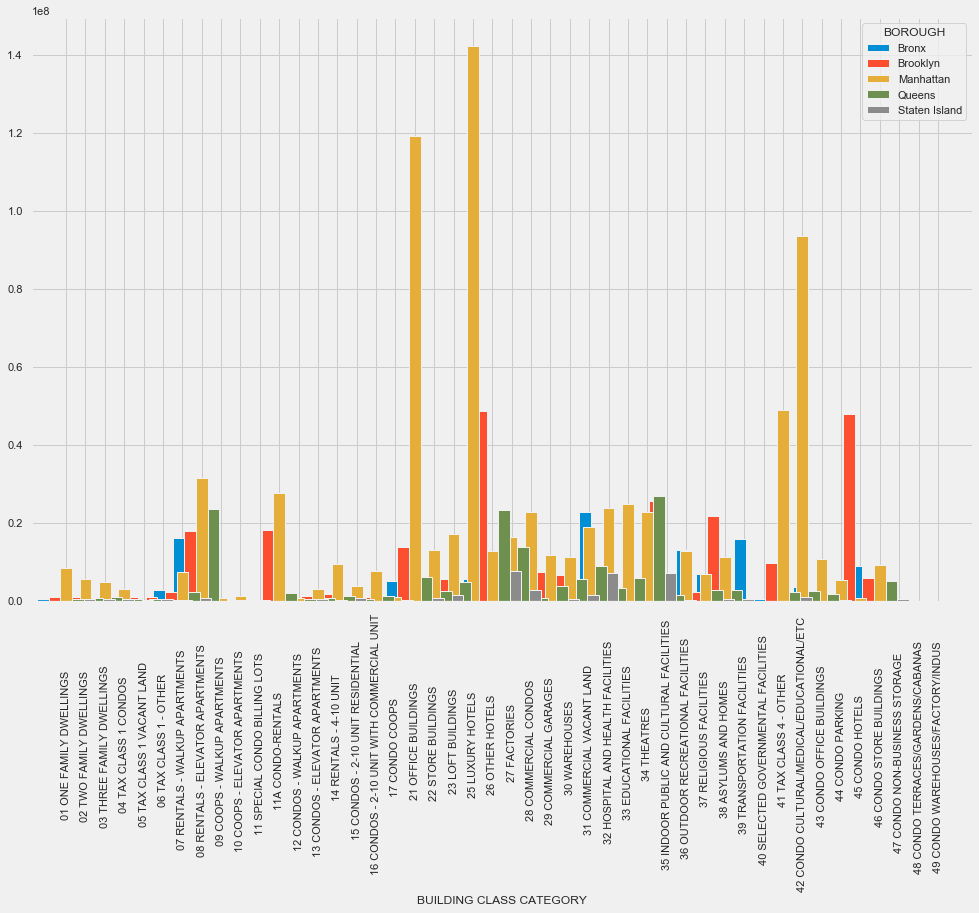

In [234]:
borough_average_saleprice_foreachbuildingclass = df.groupby(['BUILDING CLASS CATEGORY', 'BOROUGH'])['SALE PRICE'].mean()
means_df = df[['BUILDING CLASS CATEGORY', 'BOROUGH', 'SALE PRICE']]
means_grouped = means_df.groupby([means_df['BUILDING CLASS CATEGORY'], means_df['BOROUGH']])['SALE PRICE'].mean()
final_data = pd.DataFrame({
    'COUNT' : means_grouped
}).reset_index()
final_data = final_data.pivot(index='BUILDING CLASS CATEGORY', columns='BOROUGH', values='COUNT')
final_data = final_data.fillna(0.0)
final_data.plot.bar(width=3)
# borough_average_saleprice_foreachbuildingclass

In [235]:
buildingclass_average_saleprice_overall_foreachbuildingclass = df.groupby(['BUILDING CLASS CATEGORY'])['SALE PRICE'].mean()

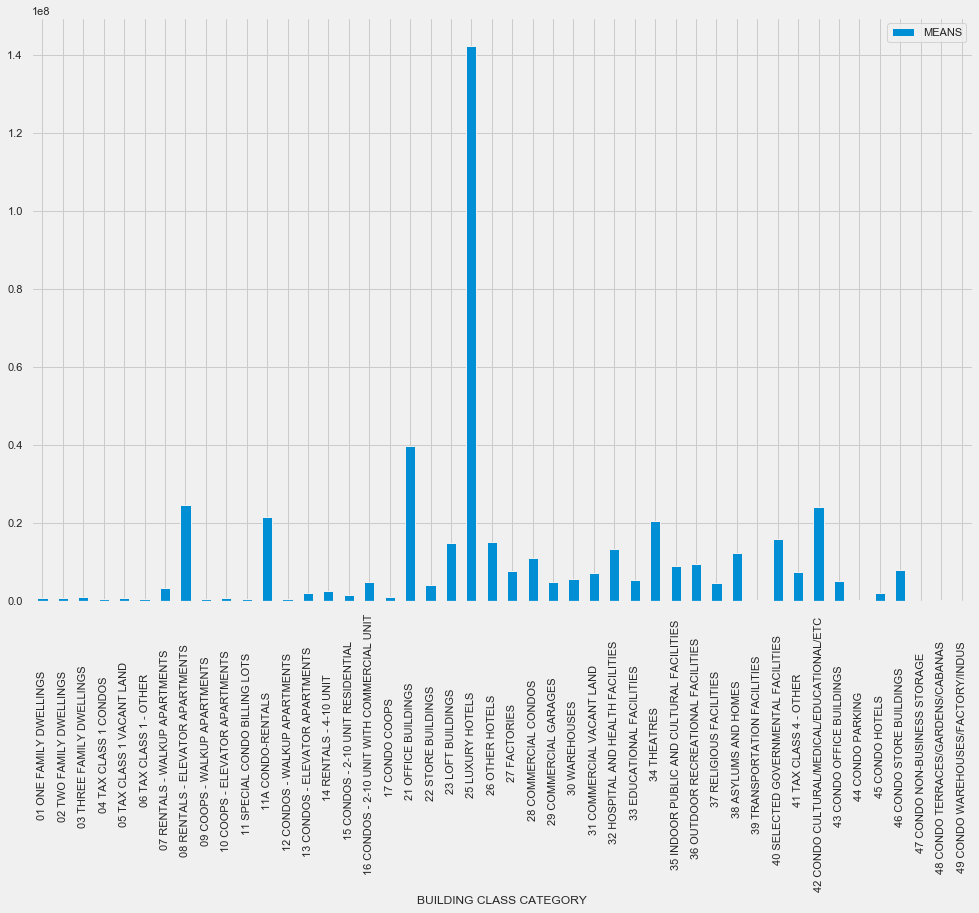

In [236]:
names = buildingclass_average_saleprice_overall_foreachbuildingclass.index
means = buildingclass_average_saleprice_overall_foreachbuildingclass
bar_df = pd.DataFrame({
    'BUILDING CLASS CATEGORY' : names,
    'MEANS' : means
})
bar_df.plot.bar(x='BUILDING CLASS CATEGORY', y='MEANS', rot=90)

#### 4) In Which Month/Season can we get the Highest Sales?

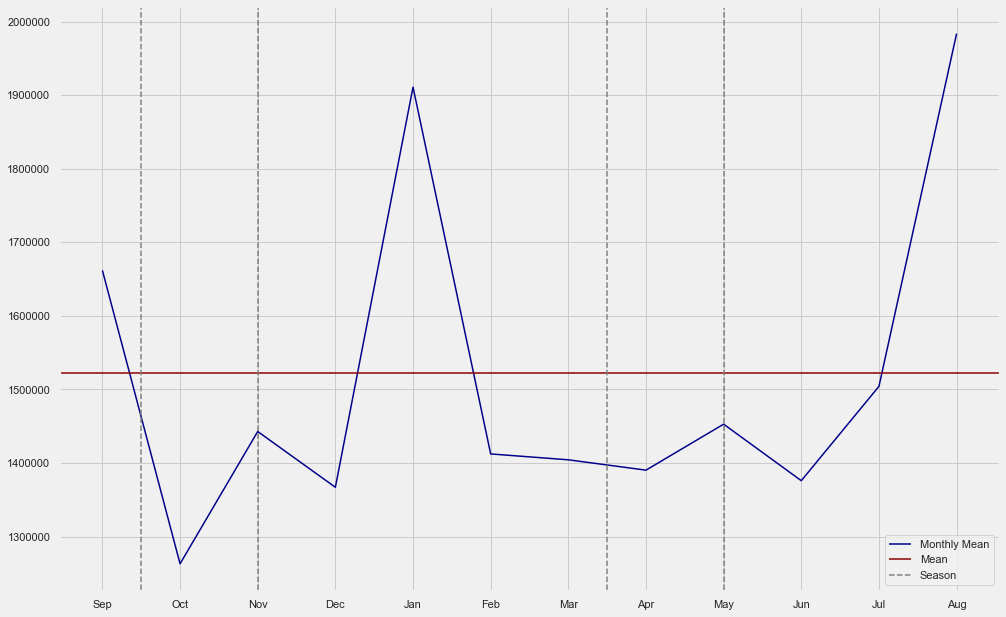

In [237]:
months = ['Sep', 'Oct', 'Nov', 'Dec', 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug']
grouped = df.groupby(df['SALE DATE'].dt.month)['SALE PRICE']
grouped_mean = grouped.mean()
plt.plot(months, grouped_mean, c = 'DarkBlue', label='Monthly Mean')
plt.axhline(df['SALE PRICE'].mean(), color='DarkRed', linestyle='solid', label="Mean")
plt.axvline(0.5, color='grey', linestyle='dashed', label='Season')
plt.axvline(2, color='grey', linestyle='dashed')
plt.axvline(6.5, color='grey', linestyle='dashed')
plt.axvline(8, color='grey', linestyle='dashed')
plt.legend()

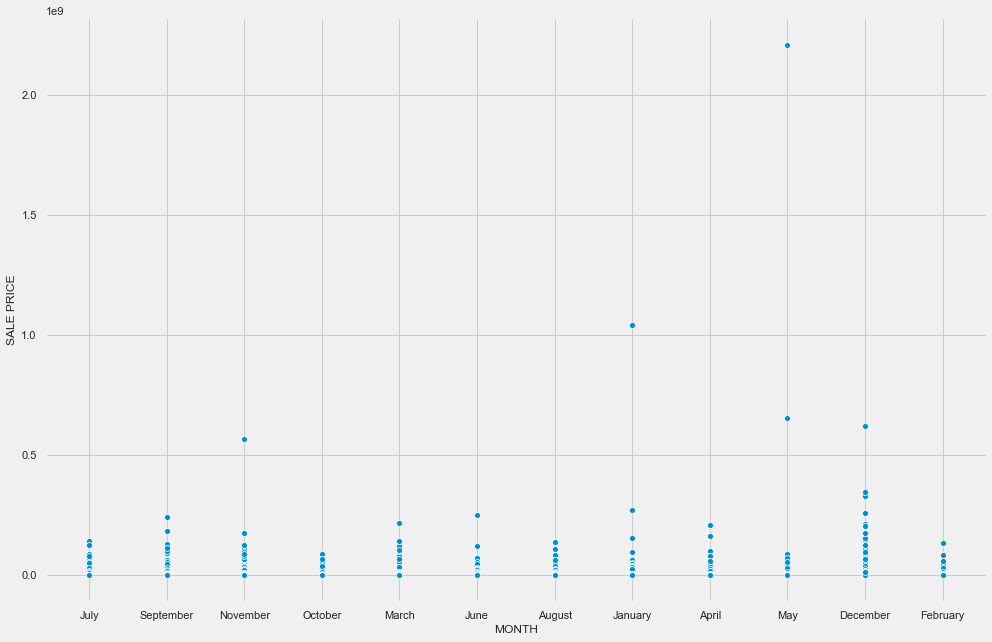

In [238]:
scat_df = pd.DataFrame({
    'MONTH' : df['SALE DATE'].dt.strftime('%B'),
    'SALE PRICE' : df['SALE PRICE']
})
sns.scatterplot(scat_df['MONTH'], scat_df['SALE PRICE'])